# ADTA 5560: Recurrent Neural Networks for Sequence Data
Thuan L Nguyen, PhD

# Final Project by Yog Chaudhary 


In [1]:
# import all the basic python libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

2024-12-07 21:42:10.229114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-12-07 21:42:10.229154: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# for timeseries RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [3]:
# Import keras timegenerator and min max scaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

# Generate Data

In [4]:
# Create simple sine wave using numpy

x=np.linspace(0,50,500)
y=np.sin(x)

In [5]:
x

array([ 0.        ,  0.1002004 ,  0.2004008 ,  0.3006012 ,  0.4008016 ,
        0.501002  ,  0.6012024 ,  0.70140281,  0.80160321,  0.90180361,
        1.00200401,  1.10220441,  1.20240481,  1.30260521,  1.40280561,
        1.50300601,  1.60320641,  1.70340681,  1.80360721,  1.90380762,
        2.00400802,  2.10420842,  2.20440882,  2.30460922,  2.40480962,
        2.50501002,  2.60521042,  2.70541082,  2.80561122,  2.90581162,
        3.00601202,  3.10621242,  3.20641283,  3.30661323,  3.40681363,
        3.50701403,  3.60721443,  3.70741483,  3.80761523,  3.90781563,
        4.00801603,  4.10821643,  4.20841683,  4.30861723,  4.40881764,
        4.50901804,  4.60921844,  4.70941884,  4.80961924,  4.90981964,
        5.01002004,  5.11022044,  5.21042084,  5.31062124,  5.41082164,
        5.51102204,  5.61122244,  5.71142285,  5.81162325,  5.91182365,
        6.01202405,  6.11222445,  6.21242485,  6.31262525,  6.41282565,
        6.51302605,  6.61322645,  6.71342685,  6.81362725,  6.91

In [6]:
y

array([ 0.        ,  0.10003281,  0.19906213,  0.2960945 ,  0.39015654,
        0.48030464,  0.56563445,  0.64528998,  0.71847213,  0.78444678,
        0.84255206,  0.89220511,  0.93290779,  0.96425181,  0.98592271,
        0.99770312,  0.99947484,  0.99122011,  0.97302173,  0.94506227,
        0.9076222 ,  0.86107713,  0.80589396,  0.74262629,  0.6719088 ,
        0.5944509 ,  0.51102964,  0.42248187,  0.32969589,  0.23360248,
        0.13516563,  0.03537285, -0.06477479, -0.16427262, -0.26212252,
       -0.35734288, -0.44897847, -0.53611004, -0.61786349, -0.69341871,
       -0.76201775, -0.82297244, -0.8756713 , -0.91958566, -0.95427499,
       -0.97939131, -0.99468264, -0.99999559, -0.99527686, -0.98057379,
       -0.95603388, -0.9219033 , -0.87852444, -0.82633246, -0.76585095,
       -0.69768664, -0.62252332, -0.54111503, -0.45427842, -0.36288461,
       -0.26785044, -0.17012928, -0.07070142,  0.02943569,  0.12927751,
        0.22782246,  0.32408195,  0.41709035,  0.50591461,  0.58

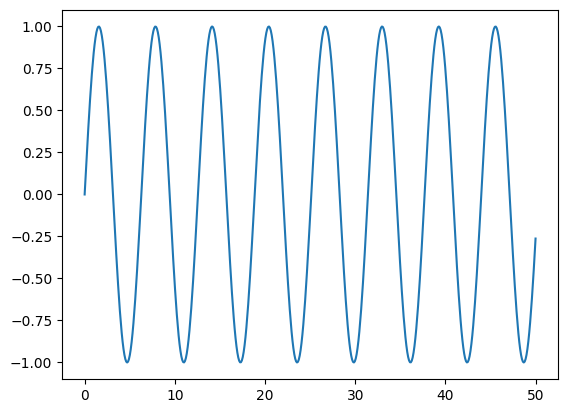

In [7]:
plt.plot(x,y)

In [8]:
#Load the data into a pandas dataframe
df=pd.DataFrame(data=y,index=x,columns=['sine'])

In [9]:
df.head(5)

,sine
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157


In [10]:
len(df)

500

# Split Data(Train/Test)

In [11]:
#Set percentage of data used for testing
test_percent=0.2

In [12]:
#Number of data points reserved for testing the model
len(df)*test_percent

100.0

In [13]:
#Need to find the Length of the testing dataset
test_length=np.round(len(df)*test_percent)

In [14]:
test_length

100.0

In [15]:
#The testing dataset starts at this index
test_start_index = int(len(df)-test_length)

In [16]:
test_start_index

400

In [17]:
# create seperate training/testing datasets

data_train=df.iloc[: test_start_index]
data_train=df.iloc[test_start_index :]

In [18]:
data_train.head(5)

,sine
40.080160,0.689316
40.180361,0.613388
40.280561,0.531308
40.380762,0.443897
40.480962,0.352033


In [19]:
data_train=df.iloc[: test_start_index]
data_train=df.iloc[test_start_index :]
data_test=df.iloc[test_start_index :]

In [20]:
data_test.head(5)

,sine
40.080160,0.689316
40.180361,0.613388
40.280561,0.531308
40.380762,0.443897
40.480962,0.352033


# Normalize Data

In [21]:
#Create a MinMaxscaler to normalize the data
scaler=MinMaxScaler()

In [22]:
#Train the scaler to perform the normalization
scaler.fit(data_train)

MinMaxScaler()

In [23]:
#Normalize the training dataset
normalized_train=scaler.transform(data_train)

#Normalize the testing dataset
normalized_train=scaler.transform(data_test)

# Create TimeseriesGenerator instance

In [24]:
# Set the length of the input sequence
# Use 50 historical data points to predict the next one

length=50
# batch_size: Number of time series samples in each batch
# One sample: each sample is a time series input sequence

batch_size=1

In [25]:
# Create a TimeseriesGenerator for training: train_tsGenerator
# TimeseriesGenerator(inputs dataset, outputs dataset, legth, batch_size)

train_tsGenerator50=TimeseriesGenerator(normalized_train,normalized_train,length=length, batch_size=batch_size)

In [26]:
len(normalized_train)

100

In [27]:
# What does the first batch look like?

x,y=train_tsGenerator50[0]

In [28]:
# Print x.flatten

x.flatten()

array([8.44964030e-01, 8.06986495e-01, 7.65931167e-01, 7.22209902e-01,
       6.76261298e-01, 6.28546301e-01, 5.79543574e-01, 5.29744698e-01,
       4.79649242e-01, 4.29759749e-01, 3.80576697e-01, 3.32593478e-01,
       2.86291445e-01, 2.42135087e-01, 2.00567369e-01, 1.62005286e-01,
       1.26835683e-01, 9.54113721e-02, 6.80475922e-02, 4.50188496e-02,
       2.65561622e-02, 1.28447425e-02, 4.02213984e-03, 1.76860009e-04,
       1.34747781e-03, 7.52224994e-03, 1.86392328e-02, 3.45869039e-02,
       5.52052805e-02, 8.02875250e-02, 1.09582019e-01, 1.42794889e-01,
       1.79592951e-01, 2.19607059e-01, 2.62435801e-01, 3.07649533e-01,
       3.54794681e-01, 4.03398299e-01, 4.52972809e-01, 5.03020893e-01,
       5.53040483e-01, 6.02529796e-01, 6.50992369e-01, 6.97942038e-01,
       7.42907819e-01, 7.85438626e-01, 8.25107802e-01, 8.61517398e-01,
       8.94302161e-01, 9.23133205e-01])

In [29]:
#Print y: what does x predict
y

array([[0.9477213]])

In [30]:
# Dataset: Only one column/attribute: Sine values of index x
# Features: How many features used to train the model: only one

n_features=1

# define model
model=Sequential()

# Add a simple RNN layer : Using simple RNN Cells
model.add(SimpleRNN(75,input_shape=(length,n_features)))

# Add a fully connected layer for the final prediction
model.add(Dense(1))

2024-12-07 21:42:12.600631: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-07 21:42:12.600664: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-07 21:42:12.600690: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tf2-keras-ann-vm): /proc/driver/nvidia/version does not exist
2024-12-07 21:42:12.600962: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Compile the model

In [31]:
# Compile the model
# Loss function: Mean Squared Error
# Optimizer=Adam

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 75)                5775      
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Fit the model
# Use fit_generator(), Not fit()

model.fit(train_tsGenerator50,epochs=5)    

Epoch 1/5
50/50 [==============================] - 1s 7ms/step - loss: 0.0263
Epoch 2/5
50/50 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 3/5
50/50 [==============================] - 0s 7ms/step - loss: 1.5110e-04
Epoch 4/5
50/50 [==============================] - 0s 7ms/step - loss: 6.3664e-05
Epoch 5/5
50/50 [==============================] - 0s 8ms/step - loss: 4.1159e-05


# Visualize Model's Performance after Training

<AxesSubplot:>

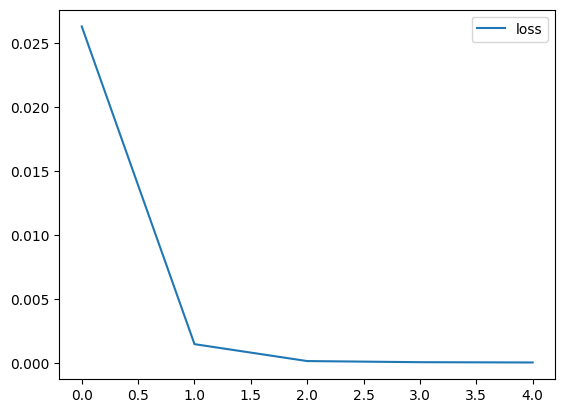

In [33]:
# Load the loss data into dataframe
df_model_loss=pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.Plot()
df_model_loss.plot()

# Evaluate Model on Test Data


In [34]:
# Number of time steps of the input time series

length

50

In [35]:
first_eval_batch=normalized_train[-length : ]
first_eval_batch

array([[0.9477213 ],
       [0.9678198 ],
       [0.98322706],
       [0.99378854],
       [0.99939828],
       [1.        ],
       [0.99558767],
       [0.98620556],
       [0.97194777],
       [0.95295735],
       [0.92942479],
       [0.90158617],
       [0.86972077],
       [0.83414823],
       [0.79522543],
       [0.75334282],
       [0.70892055],
       [0.66240426],
       [0.61426058],
       [0.56497249],
       [0.51503442],
       [0.46494734],
       [0.4152137 ],
       [0.36633243],
       [0.31879389],
       [0.27307497],
       [0.22963431],
       [0.18890769],
       [0.15130367],
       [0.11719949],
       [0.08693727],
       [0.06082059],
       [0.03911144],
       [0.02202761],
       [0.00974048],
       [0.00237331],
       [0.        ],
       [0.00264436],
       [0.01027987],
       [0.02282992],
       [0.04016863],
       [0.06212204],
       [0.08846993],
       [0.11894799],
       [0.15325047],
       [0.19103326],
       [0.23191732],
       [0.275

In [36]:
first_eval_batch=first_eval_batch.reshape((1,length,n_features))
first_eval_batch

array([[[0.9477213 ],
        [0.9678198 ],
        [0.98322706],
        [0.99378854],
        [0.99939828],
        [1.        ],
        [0.99558767],
        [0.98620556],
        [0.97194777],
        [0.95295735],
        [0.92942479],
        [0.90158617],
        [0.86972077],
        [0.83414823],
        [0.79522543],
        [0.75334282],
        [0.70892055],
        [0.66240426],
        [0.61426058],
        [0.56497249],
        [0.51503442],
        [0.46494734],
        [0.4152137 ],
        [0.36633243],
        [0.31879389],
        [0.27307497],
        [0.22963431],
        [0.18890769],
        [0.15130367],
        [0.11719949],
        [0.08693727],
        [0.06082059],
        [0.03911144],
        [0.02202761],
        [0.00974048],
        [0.00237331],
        [0.        ],
        [0.00264436],
        [0.01027987],
        [0.02282992],
        [0.04016863],
        [0.06212204],
        [0.08846993],
        [0.11894799],
        [0.15325047],
        [0

In [37]:
first_eval_batch.shape

(1, 50, 1)

# Evaluate Model

In [38]:
# All the code for evaluation
# Declare a list to store all the predictions
# similar to: test_predictions = list();

test_predictions=[]

first_eval_batch=normalized_train[-length:]

current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(data_test)):
    
    #Get the value of the first element: The prediction
    current_pred=model.predict(current_batch)[0]
    
    #store prediction into the list of predictions
    test_predictions.append(current_pred)
    
    #Generate a new batch to prepare for the next iteration of testing
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [39]:
# Convert the scaled result back to the real values

true_predictions=scaler.inverse_transform(test_predictions)

true_predictions

array([[-0.17515654],
       [-0.07715259],
       [ 0.01863386],
       [ 0.11718175],
       [ 0.20975454],
       [ 0.30540848],
       [ 0.39184376],
       [ 0.4773437 ],
       [ 0.55848169],
       [ 0.63832388],
       [ 0.70761739],
       [ 0.77246732],
       [ 0.82925425],
       [ 0.88090037],
       [ 0.91992873],
       [ 0.95310045],
       [ 0.97490934],
       [ 0.98622533],
       [ 0.98632793],
       [ 0.97917167],
       [ 0.96089675],
       [ 0.93147947],
       [ 0.89306529],
       [ 0.84473472],
       [ 0.78772924],
       [ 0.72227109],
       [ 0.65211744],
       [ 0.57366163],
       [ 0.49095935],
       [ 0.40337722],
       [ 0.31331287],
       [ 0.21882318],
       [ 0.12430894],
       [ 0.02737051],
       [-0.06939442],
       [-0.166972  ],
       [-0.26136475],
       [-0.35657241],
       [-0.4468347 ],
       [-0.53449595],
       [-0.61619897],
       [-0.69297019],
       [-0.76179243],
       [-0.82378714],
       [-0.87667423],
       [-0

In [40]:
data_test

,sine
40.080160,0.689316
40.180361,0.613388
40.280561,0.531308
40.380762,0.443897
40.480962,0.352033
...,...
49.599198,-0.618069
49.699399,-0.536331
49.799599,-0.449212
49.899800,-0.357587


In [41]:
data_test = data_test.copy()
data_test['Predictions'] = true_predictions

In [42]:
# Updated data_test

data_test

,sine,Predictions
40.080160,0.689316,-0.175157
40.180361,0.613388,-0.077153
40.280561,0.531308,0.018634
40.380762,0.443897,0.117182
40.480962,0.352033,0.209755
...,...,...
49.599198,-0.618069,0.118795
49.699399,-0.536331,0.023396
49.799599,-0.449212,-0.073168
49.899800,-0.357587,-0.168840


# Visualize Data

<AxesSubplot:>

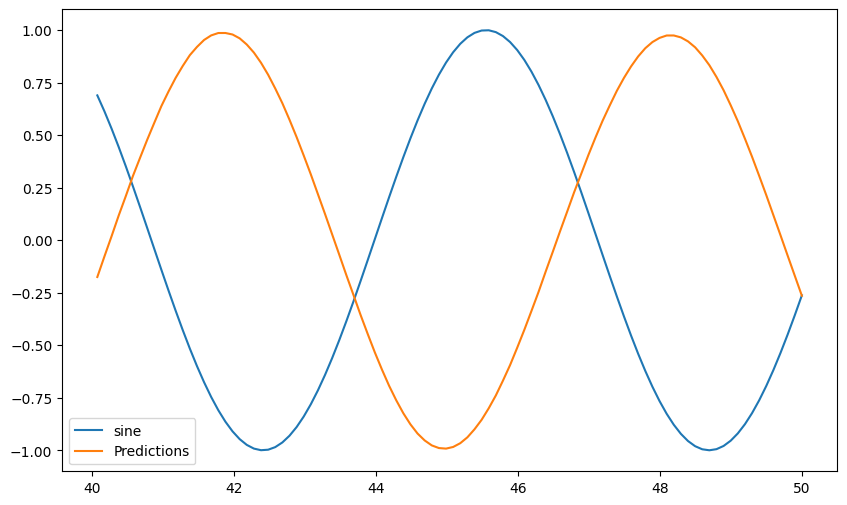

In [43]:
# Visualize the data of the updated test data

data_test.plot(figsize=(10,6))

In [44]:
# Than you 